In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai import *
#from fastai.vision import *
from fastai.tabular import *

In [4]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
dep_var = 'SalePrice'
cat_names = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
             'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
             'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
             'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
             'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
             'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
             'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition',
             'MSSubClass', 'OverallQual', 'OverallCond','BsmtFullBath',
              'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
              'Fireplaces','GarageCars','YrSold' , 'MoSold', 'LowQualFinSF' , 'PoolArea', 
             'YearBuilt', 'YearRemodAdd' , 'MiscVal', '3SsnPorch']
cont_names = ['LotFrontage', 'LotArea',  
               'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
              'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
              'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']

print("Categorical columns are : ", cat_names)
print('Continuous numerical columns are :', cont_names)
procs = [FillMissing, Categorify, Normalize]

Categorical columns are :  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'YrSold', 'MoSold', 'LowQualFinSF', 'PoolArea', 'YearBuilt', 'YearRemodAdd', 'MiscVal', '3SsnPorch']
Continuous numerical columns are : ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',

In [8]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [9]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
train[train['LotFrontage'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000


In [11]:
test_id = test['Id']
test.fillna(value = test.mean(), inplace = True)

In [18]:
train.shape

(1460, 81)

In [13]:
test = TabularList.from_df(test, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [19]:
data = (TabularList.from_df(train, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                        .split_by_rand_pct(valid_pct = 0.3, seed = 42)
                        .label_from_df(cols = dep_var, label_cls = FloatList, log = True )
                        .add_test(test)
                        .databunch())

In [21]:
data.show_batch(rows=5)

MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,YrSold,MoSold,LowQualFinSF,PoolArea,YearBuilt,YearRemodAdd,MiscVal,3SsnPorch,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,target
RL,Pave,#na#,IR1,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,#na#,#na#,#na#,COD,Abnorml,20,8,5,1,0,2,0,2,1,7,1,2,2009,9,0,0,2005,2006,0,0,False,False,False,0.7681,0.0219,1.5129,1.1519,-0.2802,0.6654,1.7528,1.7309,-0.8019,0.5928,1.0870,0.6855,0.5122,-0.0798,-0.3462,-0.2758,12.456831
RL,Pave,#na#,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,#na#,Detchd,Unf,TA,TA,Y,#na#,#na#,#na#,WD,Normal,20,5,6,1,0,1,0,3,1,7,0,2,2007,7,0,0,1959,2002,0,0,False,False,False,0.2038,-0.2963,-0.6082,-0.0895,-0.2802,0.1946,0.0072,0.4037,-0.8019,-0.3809,-0.1965,0.7047,-0.7407,-0.7156,-0.3462,-0.2758,11.923378
RM,Pave,Grvl,IR3,Bnk,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,N,FuseP,TA,Typ,#na#,Detchd,Unf,TA,TA,N,#na#,#na#,#na#,WD,Normal,30,5,5,0,0,1,0,2,1,4,0,2,2008,6,0,0,1925,2004,0,0,False,False,False,-1.7497,-0.4866,-0.6082,-0.9700,-0.2802,0.2439,-0.8488,-1.0416,-0.8019,-1.4412,-0.5692,0.1290,-0.7407,-0.7156,-0.3462,-0.2758,11.198215
RL,Pave,#na#,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Gd,Y,SBrkr,TA,Min1,TA,Attchd,RFn,TA,TA,Y,#na#,MnPrv,#na#,WD,Normal,20,5,6,0,0,2,1,3,1,7,1,2,2006,7,0,0,1968,1993,0,0,False,False,False,0.3340,-0.0362,-0.6082,0.2692,-0.2802,0.7170,0.8968,1.4151,-0.8019,0.3611,-0.4450,-0.1781,-0.7407,0.6715,2.5790,-0.2758,12.100712
RM,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Stucco,Stucco,None,TA,TA,BrkTil,Fa,TA,No,Unf,Unf,GasA,TA,Y,FuseA,TA,Typ,#na#,Detchd,Unf,TA,TA,Y,#na#,#na#,#na#,WD,Normal,50,6,8,0,0,1,0,2,1,6,0,2,2006,10,0,0,1920,1950,0,0,False,False,False,-1.3156,-0.5601,-0.6082,-0.9700,-0.2802,0.1721,-0.9203,-1.1186,0.0686,-0.7745,0.4660,-0.1781,-0.7407,-0.7156,-0.3462,-0.2758,11.6613455


In [23]:
learn = tabular_learner(data, layers=[200,100], metrics=rmse)

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


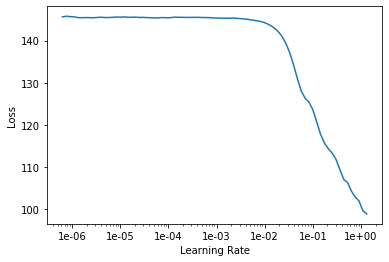

In [26]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(10, max_lr=slice(1e-01))

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,133.678116,96.832718,9.840227,00:38
1,72.979378,58.408569,7.639140,00:35
2,43.557743,2.740221,1.654431,00:35
3,27.549177,0.302235,0.549146,00:36
4,18.344555,0.058553,0.241624,00:37
5,12.633445,0.033638,0.182991,00:34
6,8.888755,0.023681,0.151307,00:37
7,6.344063,0.025182,0.158037,00:37
8,4.575105,0.022463,0.147231,00:37
9,3.322410,0.021901,0.146848,00:35


In [30]:
preds, _ = learn.get_preds(DatasetType.Test)

In [31]:
labels = [np.exp(p[0].data.item()) for p in preds]

In [35]:
submission = pd.DataFrame({'Id': test_id, 'SalePrice': labels})
submission.to_csv('submission.csv', index=False)
submission.head()

,Id,SalePrice
0,1461,117540.992852
1,1462,144388.567310
2,1463,205124.395125
3,1464,176686.177975
4,1465,202305.856556
